# Project Name: Flight Price Prediction Project

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Flight_price_data')
df

,Airline Name,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,Air India,New Delhi,Mumbai,07:00,09:05,2h 05m,Non Stop,"6,690"
1,IndiGo,New Delhi,Mumbai,07:15,09:25,2h 10m,Non Stop,"6,690"
2,Air India,New Delhi,Mumbai,08:00,10:10,2h 10m,Non Stop,"6,690"
3,IndiGo,New Delhi,Mumbai,08:10,10:20,2h 10m,Non Stop,"6,690"
4,Go First,New Delhi,Mumbai,11:15,13:25,2h 10m,Non Stop,"6,690"
...,...,...,...,...,...,...,...,...
4495,Air India,Jaipur,Kolkata,20:35,22:20,25h 45m,1 Stop,"13,616"
4496,IndiGo,Jaipur,Kolkata,09:55,20:15,10h 20m,1 Stop,"13,721"
4497,IndiGo,Jaipur,Kolkata,09:55,22:00,12h 05m,1 Stop,"13,721"
4498,IndiGo,Jaipur,Kolkata,14:20,21:55,7h 35m,1 Stop,"13,826"


In [3]:
df.shape

(4500, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Airline Name    4500 non-null   object
 1   Source          4500 non-null   object
 2   Destination     4500 non-null   object
 3   Departure Time  4500 non-null   object
 4   Arrival Time    4500 non-null   object
 5   Duration        4500 non-null   object
 6   Total Stops     4500 non-null   object
 7   Price           4500 non-null   object
dtypes: object(8)
memory usage: 281.4+ KB


In [5]:
d=df.columns
for i in d:
    print(df[i].value_counts())
    print("--- --:-- --- --:----- --:-- --- --:----- --:-- ---")

IndiGo       1584
Vistara      1010
Air India     947
Go First      430
Air Asia      301
SpiceJet      228
Name: Airline Name, dtype: int64
--- --:-- --- --:----- --:-- --- --:----- --:-- ---
Bangalore    653
Mumbai       619
Kolkata      573
Chennai      536
Patna        464
Goa          457
Hyderabad    442
Pune         311
Jaipur       289
New Delhi    156
Name: Source, dtype: int64
--- --:-- --- --:----- --:-- --- --:----- --:-- ---
Mumbai       844
Kolkata      604
Chennai      487
Bangalore    480
Goa          454
Hyderabad    450
Jaipur       446
Pune         376
Patna        359
Name: Destination, dtype: int64
--- --:-- --- --:----- --:-- --- --:----- --:-- ---
20:30    111
21:00    102
21:55     79
07:00     74
15:00     66
        ... 
00:10      1
03:20      1
02:50      1
13:25      1
01:05      1
Name: Departure Time, Length: 255, dtype: int64
--- --:-- --- --:----- --:-- --- --:----- --:-- ---
19:55    102
19:35     92
14:00     85
23:35     75
20:00     64
        ... 


##### Stops

In [6]:
# Stops
df['Total Stops'].replace({"Non Stop": 0,
            "1 Stop": 1,
            "2 Stops": 2,
            "3 Stops": 3,
            "4 Stops": 4},
           inplace = True)

##### Duration

In [7]:
# Duration

df["hour"] = df['Duration'].str.split('h').str.get(0)
df["min"] = df['Duration'].str.split('h').str.get(1)
df["min"]=df["min"].str.split('m').str.get(0)
df["hour"]=df['hour'].astype('float')
df["min"]=df['min'].astype('float')

df["Duration"] = df["hour"] + df["min"]/60

In [8]:
df.sample(15)

,Airline Name,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price,hour,min
1919,IndiGo,Chennai,Pune,18:30,23:05,4.583333,1,"13,316",4.0,35.0
978,Air Asia,Bangalore,Chennai,15:20,16:15,0.916667,0,"8,301",0.0,55.0
2749,Air India,Goa,Mumbai,21:00,08:35,11.583333,1,"17,392",11.0,35.0
3561,IndiGo,Kolkata,Hyderabad,15:00,22:20,7.333333,1,"13,997",7.0,20.0
1478,Vistara,Pune,Mumbai,08:40,19:05,10.416667,1,"28,428",10.0,25.0
4325,IndiGo,Jaipur,Chennai,05:15,10:25,5.166667,1,"12,461",5.0,10.0
2461,IndiGo,Hyderabad,Pune,08:15,18:45,10.500000,1,"14,428",10.0,30.0
4475,Go First,Jaipur,Kolkata,19:00,08:30,13.500000,1,"8,051",13.0,30.0
1029,Vistara,Bangalore,Hyderabad,07:55,09:05,1.166667,0,"4,654",1.0,10.0
3313,SpiceJet,Kolkata,Bangalore,20:30,23:25,2.916667,0,"9,744",2.0,55.0


In [9]:
#dropping hour and min columns
df.drop(columns = ["hour","min"], inplace = True)

##### Price

In [10]:
#Converting data type of Price column to float
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype('float')

##### Departure & Arrival Time

In [11]:
df["Dep_hour"] = pd.to_datetime(df['Departure Time'], format="%H:%M").dt.hour
df["Dep_min"] = pd.to_datetime(df['Departure Time'], format="%H:%M").dt.minute
df["Departure Time"]= df['Dep_hour']+df['Dep_min']/60
df.drop(columns = ['Dep_hour','Dep_min'],inplace=True)    

In [12]:
df["Arvl_hour"] = pd.to_datetime(df['Arrival Time'], format="%H:%M").dt.hour
df["arvl_min"] = pd.to_datetime(df['Arrival Time'], format="%H:%M").dt.minute
df["Arrival Time"]= df['Arvl_hour']+df['arvl_min']/60
df.drop(columns = ['Arvl_hour','arvl_min'],inplace=True)    

In [13]:
df.sample(15)

,Airline Name,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
143,Air India,New Delhi,Mumbai,17.333333,8.583333,15.250000,1,23280.0
1132,Air India,Bangalore,Goa,9.000000,17.000000,8.000000,1,11235.0
550,Vistara,Mumbai,Kolkata,22.750000,18.083333,19.333333,1,11129.0
237,IndiGo,Mumbai,Chennai,10.500000,12.500000,2.000000,0,10983.0
3718,IndiGo,Kolkata,Jaipur,11.666667,16.666667,5.000000,1,13094.0
2416,Vistara,Hyderabad,Bangalore,21.583333,7.833333,10.250000,1,12906.0
2200,IndiGo,Chennai,Patna,11.166667,17.750000,6.583333,1,21685.0
3660,Air Asia,Kolkata,Goa,9.666667,19.583333,9.916667,2,23394.0
4126,Go First,Patna,Kolkata,7.666667,23.333333,15.666667,1,5727.0
83,IndiGo,New Delhi,Mumbai,13.833333,19.833333,6.000000,1,14366.0


In [14]:
df.dtypes

Airline Name       object
Source             object
Destination        object
Departure Time    float64
Arrival Time      float64
Duration          float64
Total Stops         int64
Price             float64
dtype: object

In [15]:
df.isnull().sum()

Airline Name      0
Source            0
Destination       0
Departure Time    0
Arrival Time      0
Duration          0
Total Stops       0
Price             0
dtype: int64

<AxesSubplot:>

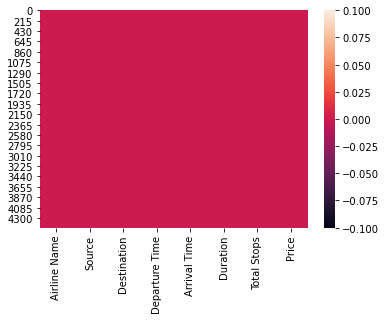

In [16]:
sns.heatmap(df.isnull())

In [17]:
df.isnull().sum().any()

False

### Exploratory Data Analysis

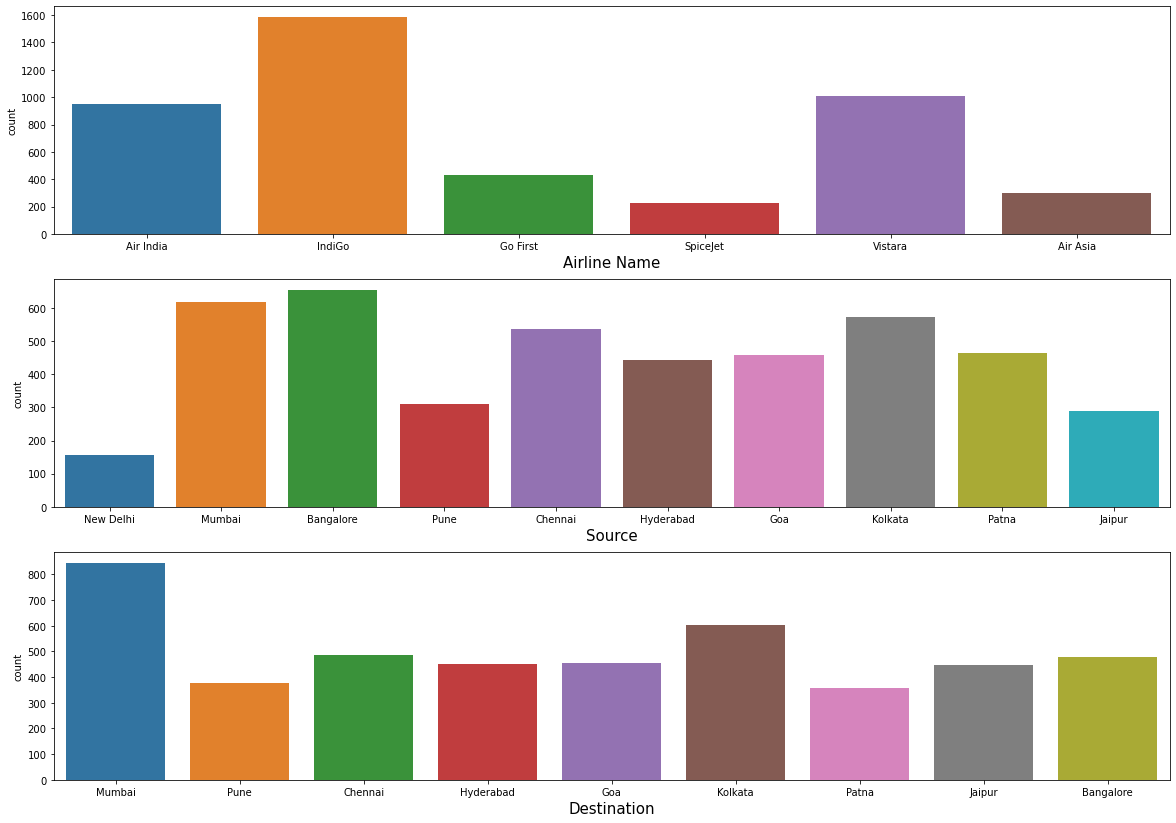

In [18]:
plt.figure(figsize=(20,200),facecolor='white')
plotnum=1
for col in df[df.columns[df.dtypes == 'object']]:
    if plotnum<=40:
        plt.subplot(40,1,plotnum)
        sns.countplot(df[col])
        plt.xlabel(col,fontsize=15)
    plotnum+=1
plt.show()

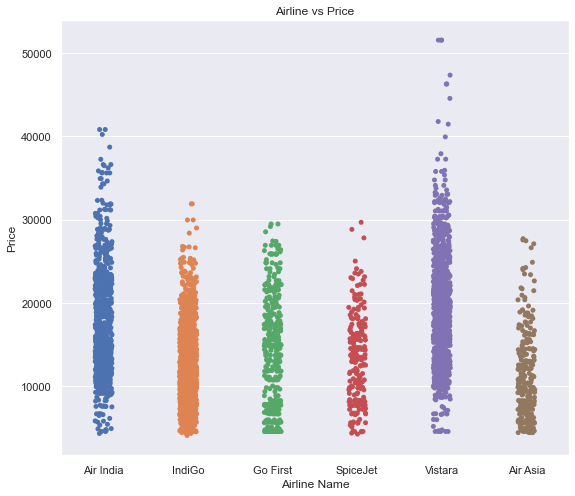

In [19]:
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,2)
sns.stripplot(x='Airline Name',y='Price', data=df)
plt.title('Airline vs Price')
plt.show()

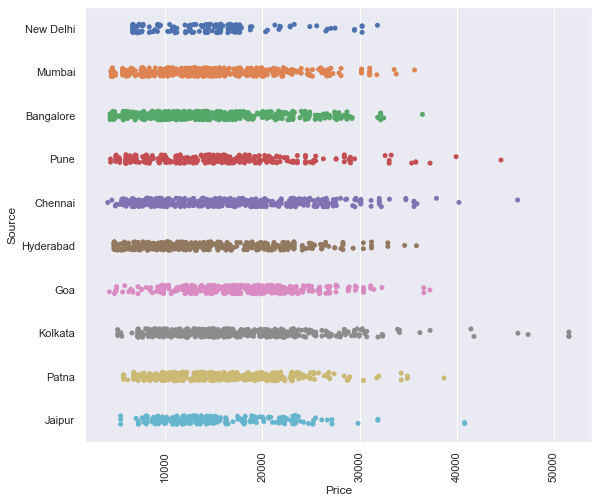

In [20]:
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,2)
sns.stripplot(y='Source',x='Price',data=df)
plt.xticks(rotation=90)
plt.show()

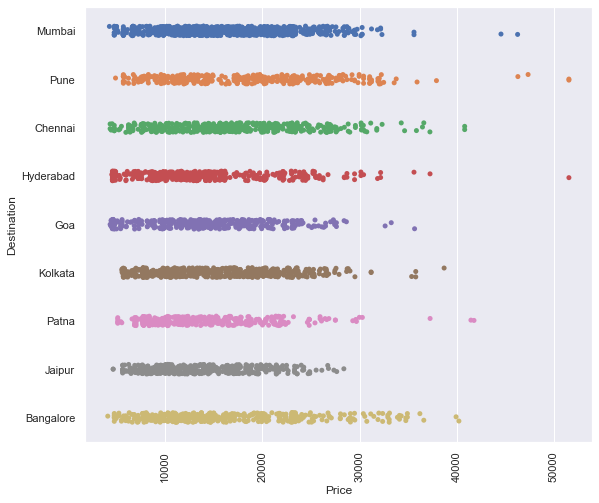

In [21]:
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,2)
sns.stripplot(y='Destination',x='Price',data=df)
plt.xticks(rotation=90)
plt.show()

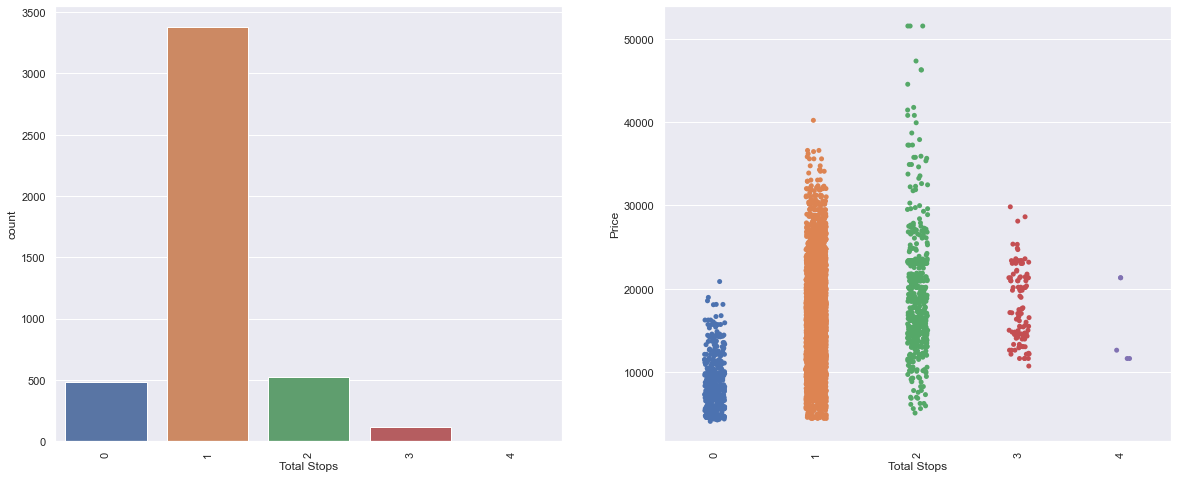

In [22]:
#lets check the count of stops and relation with price
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df['Total Stops'])
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Total Stops',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

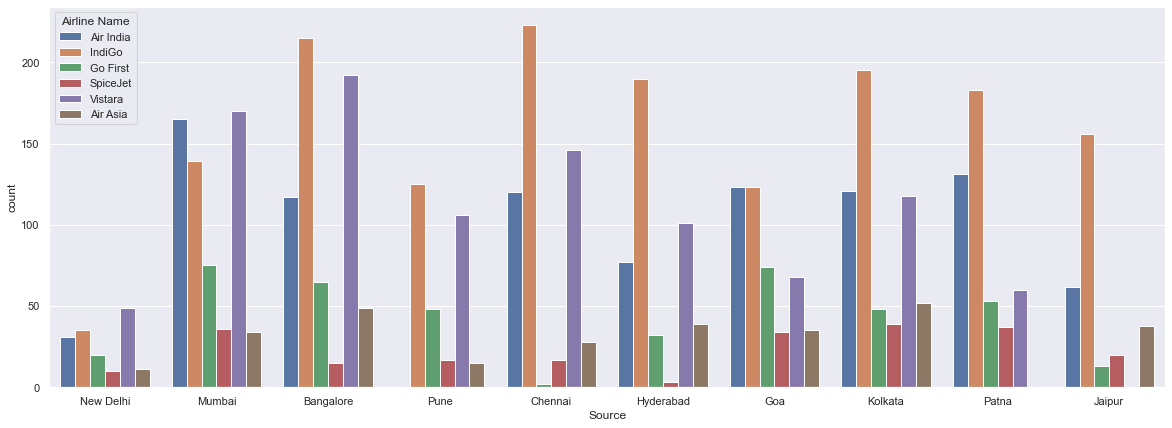

In [23]:
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "Airline Name", data = df)
plt.show()

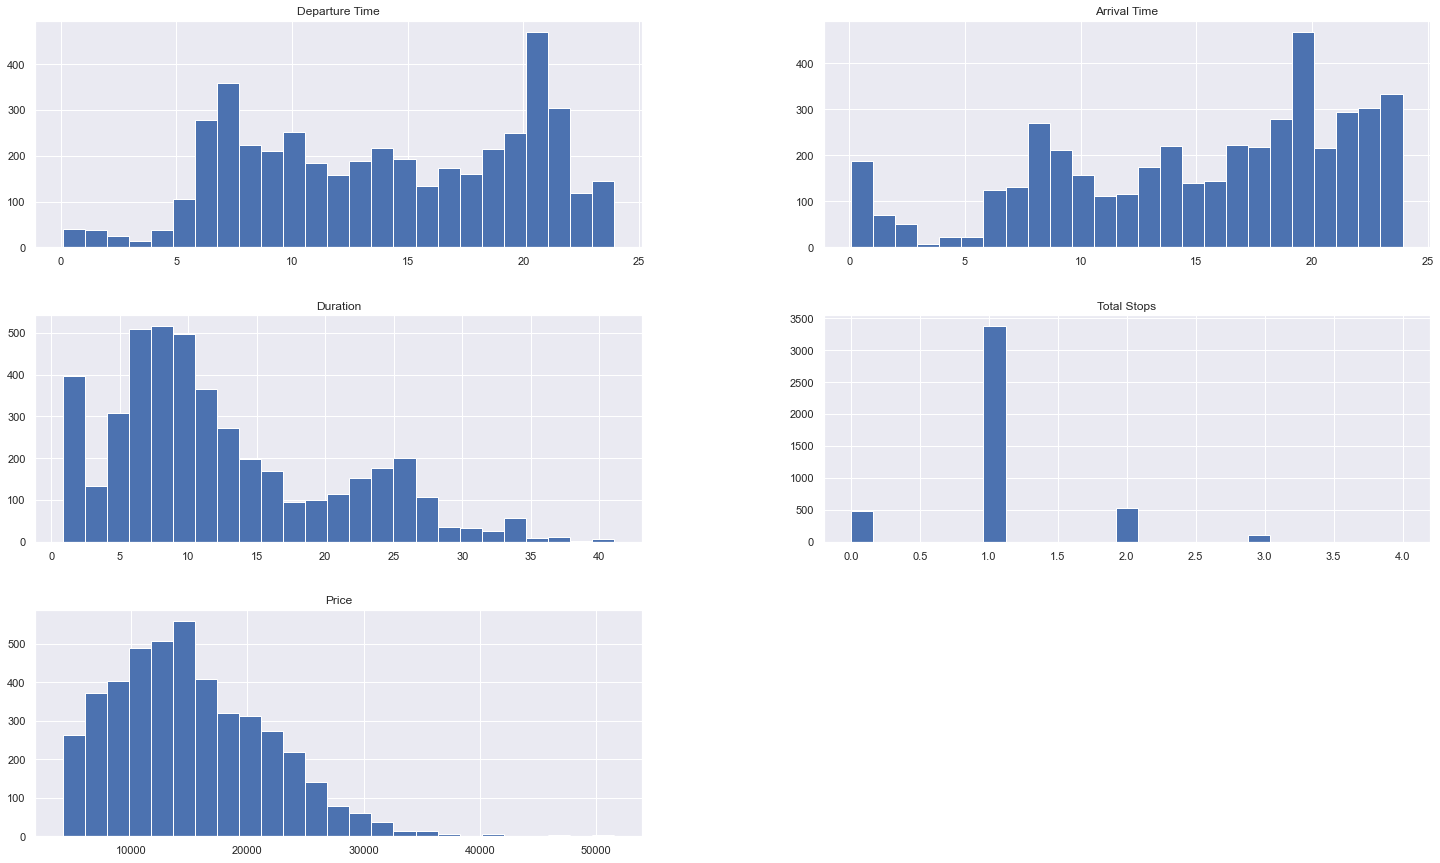

In [24]:
df.hist(bins=25,figsize=(25,15));

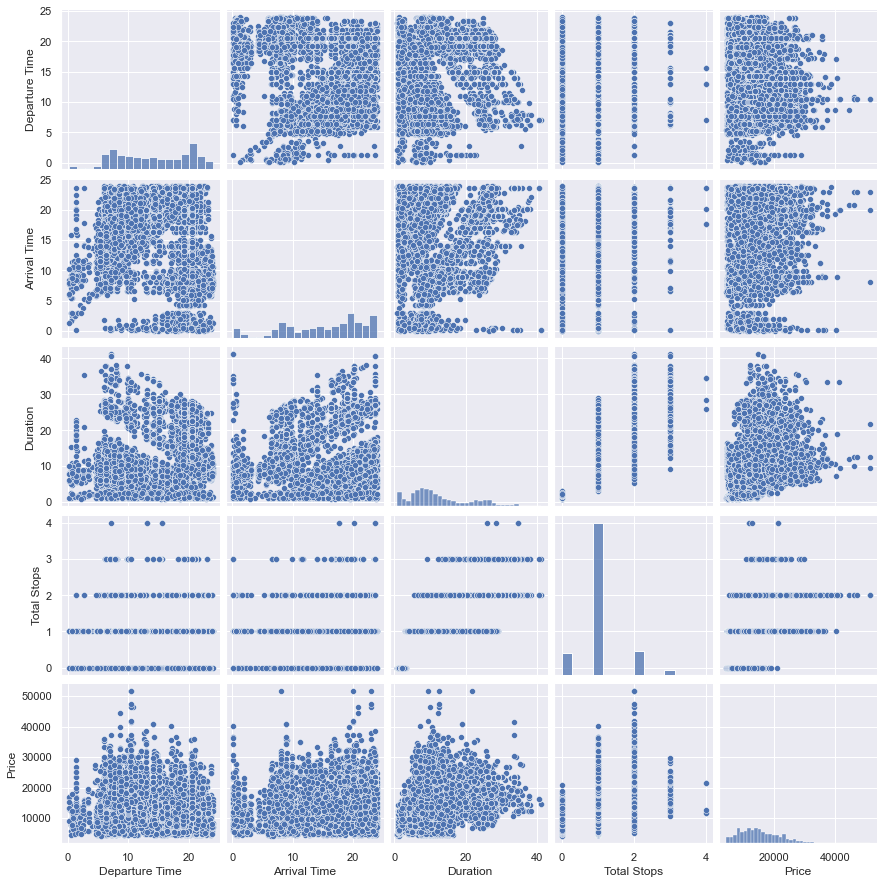

In [25]:
sns.pairplot(df)

### Encoding

In [26]:
#converting categorical data into numeric using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [27]:
df.dtypes

Airline Name      float64
Source            float64
Destination       float64
Departure Time    float64
Arrival Time      float64
Duration          float64
Total Stops         int64
Price             float64
dtype: object

In [28]:
df.head()

,Airline Name,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,1.0,7.0,6.0,7.000000,9.083333,2.083333,0,6690.0
1,3.0,7.0,6.0,7.250000,9.416667,2.166667,0,6690.0
2,1.0,7.0,6.0,8.000000,10.166667,2.166667,0,6690.0
3,3.0,7.0,6.0,8.166667,10.333333,2.166667,0,6690.0
4,2.0,7.0,6.0,11.250000,13.416667,2.166667,0,6690.0


### Statistical Summary

In [29]:
df.describe()

,Airline Name,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,2.782444,4.025333,4.029778,13.993130,15.074463,12.436000,1.062889,15177.549556
std,1.562367,2.875157,2.474678,5.946071,6.478754,8.227453,0.574172,6683.904581
min,0.000000,0.000000,0.000000,0.083333,0.083333,0.833333,0.000000,4097.000000
25%,1.000000,1.000000,2.000000,8.666667,9.666667,6.583333,1.000000,10038.750000
50%,3.000000,4.000000,4.000000,14.125000,16.583333,10.083333,1.000000,14266.500000
75%,4.000000,6.000000,6.000000,19.750000,20.250000,17.000000,1.000000,19597.000000
max,5.000000,9.000000,8.000000,23.916667,23.916667,41.083333,4.000000,51534.000000


### Correlation

In [30]:
df.corr()

,Airline Name,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
Airline Name,1.000000,0.023048,0.078653,-0.003600,0.103523,-0.019555,-0.247883,0.158287
Source,0.023048,1.000000,-0.106164,0.016569,-0.015468,0.016903,0.041716,0.008963
Destination,0.078653,-0.106164,1.000000,-0.009160,-0.026359,-0.081576,-0.019621,0.005649
Departure Time,-0.003600,0.016569,-0.009160,1.000000,-0.091566,0.126153,0.005362,-0.048632
Arrival Time,0.103523,-0.015468,-0.026359,-0.091566,1.000000,0.147103,0.120440,0.174193
Duration,-0.019555,0.016903,-0.081576,0.126153,0.147103,1.000000,0.608283,0.323175
Total Stops,-0.247883,0.041716,-0.019621,0.005362,0.120440,0.608283,1.000000,0.345954
Price,0.158287,0.008963,0.005649,-0.048632,0.174193,0.323175,0.345954,1.000000


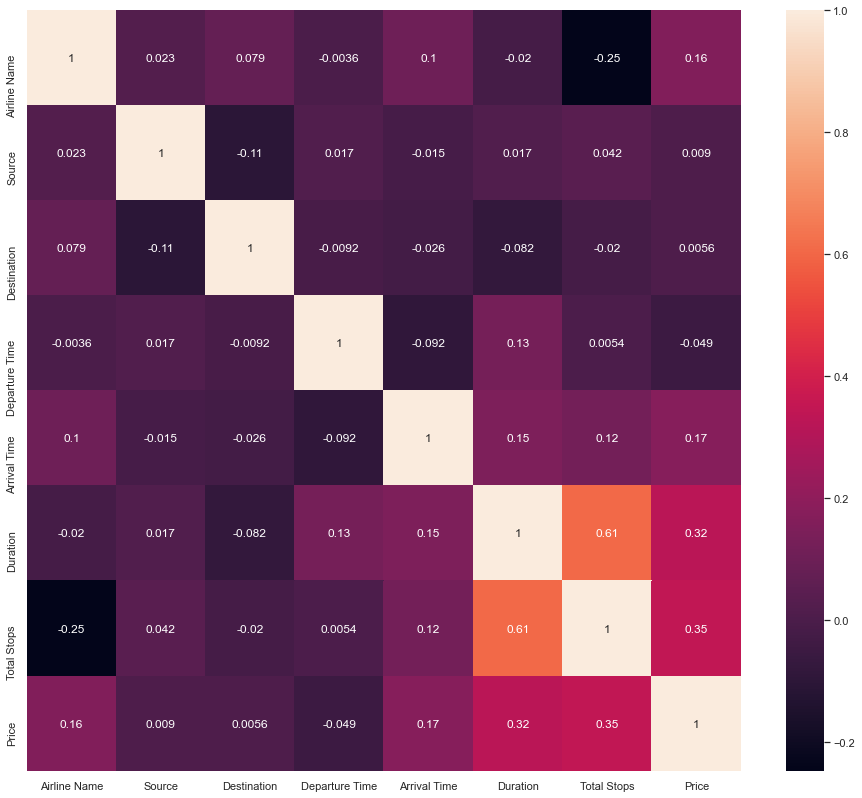

In [31]:
corr_hmap=df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr_hmap,annot=True)
plt.show()

### Outliers

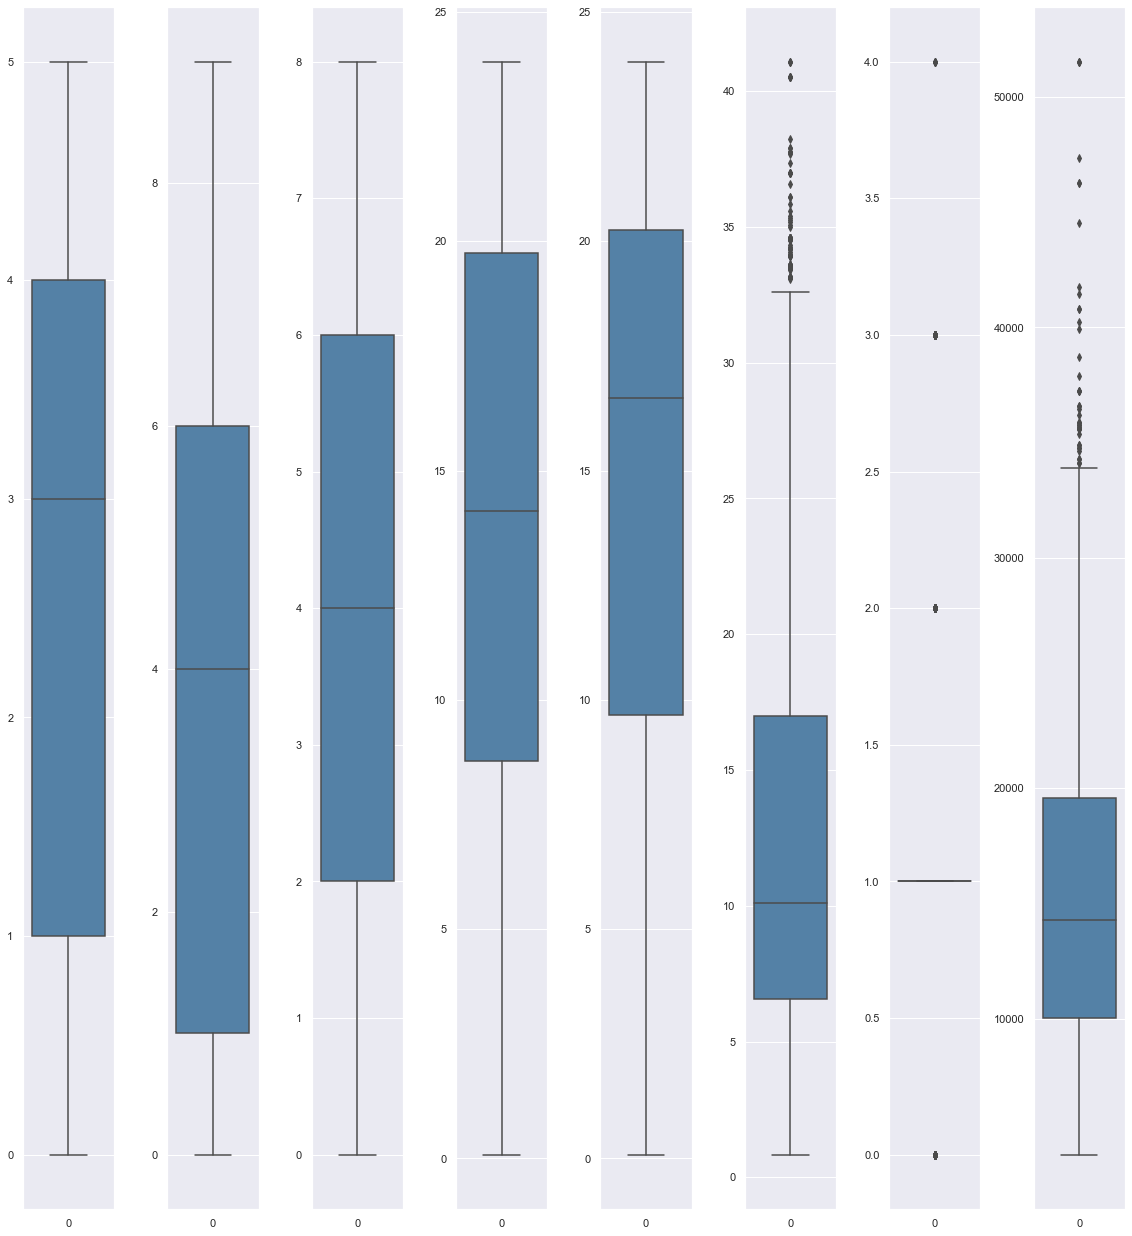

In [32]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(2*ncol,8*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='steelblue',orient='v')
    plt.tight_layout()

In [33]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [34]:
new_df=df[(z<3).all(axis=1)]

In [35]:
new_df.shape

(4341, 8)

In [36]:
df.shape

(4500, 8)

In [37]:
''' Data Loss '''

Data_loss = ((4500-4341)/4500)*100
Data_loss

3.5333333333333337

The loss of data after removing the ouliers is 3.533%.

### Skewness

In [38]:
new_df.skew()

Airline Name     -0.092779
Source            0.141966
Destination      -0.149674
Departure Time   -0.132624
Arrival Time     -0.574853
Duration          0.819782
Total Stops       0.007140
Price             0.531913
dtype: float64

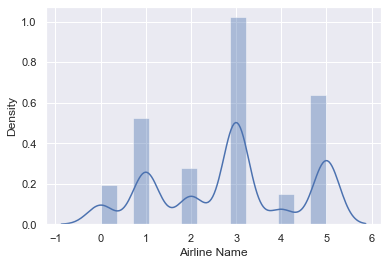

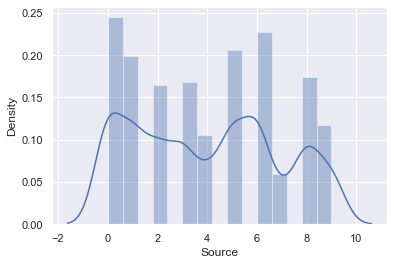

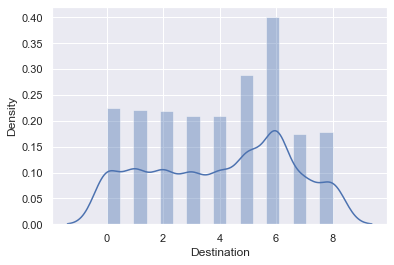

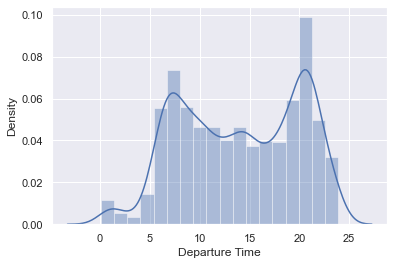

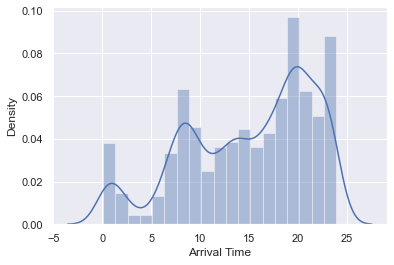

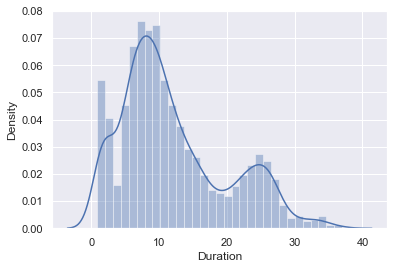

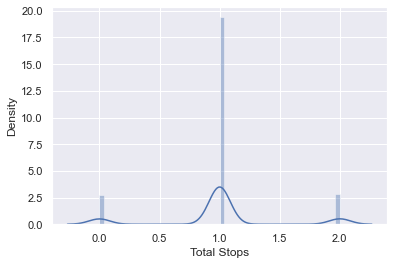

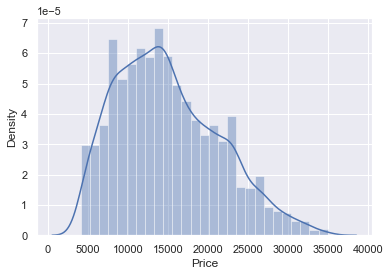

In [39]:
for i in new_df:
    sns.distplot(new_df[i])
    plt.show()

In [40]:
# Removing Skewness:

for i in new_df.columns:
    
    # we are using log transformation method to remove skewness
    if new_df.skew().loc[i]>0.5:
        new_df[i]=np.log1p(new_df[i])
        
        # we are using square method to remove skewness
        if new_df.skew().loc[i]<-0.5:
            new_df[i]=np.square(new_df[i])

In [41]:
new_df.skew()

Airline Name     -0.092779
Source            0.141966
Destination      -0.149674
Departure Time   -0.132624
Arrival Time     -0.574853
Duration          0.184010
Total Stops       0.007140
Price            -0.369120
dtype: float64

In [42]:
new_df.shape

(4341, 8)

In [43]:
df.shape

(4500, 8)

### Spliting data into X and Y

In [44]:
x = df.drop(columns = 'Price')
y = df['Price']

In [45]:
x.shape

(4500, 7)

In [46]:
y.shape

(4500,)

##### Salling:

In [50]:
from sklearn.preprocessing import StandardScaler
numeric = ['Departure Time','Arrival Time','Duration']
categorical = ['Airline Name','Source','Destination','Total Stops']
scaler = StandardScaler()
X_numeric_std = pd.DataFrame(data=scaler.fit_transform(x[numeric]), columns=numeric)
X_std = pd.merge(X_numeric_std, x[categorical], left_index=True, right_index=True)
X_std

,Departure Time,Arrival Time,Duration,Airline Name,Source,Destination,Total Stops
0,-1.176223,-0.924838,-1.258447,1.0,7.0,6.0,0
1,-1.134174,-0.873382,-1.248318,3.0,7.0,6.0,0
2,-1.008026,-0.757606,-1.248318,1.0,7.0,6.0,0
3,-0.979993,-0.731878,-1.248318,3.0,7.0,6.0,0
4,-0.461386,-0.255910,-1.248318,2.0,7.0,6.0,0
...,...,...,...,...,...,...,...
4495,1.108452,1.120536,1.618421,1.0,4.0,5.0,1
4496,-0.685649,0.798936,-0.255596,3.0,4.0,5.0,1
4497,-0.685649,1.069080,-0.042869,3.0,4.0,5.0,1
4498,0.057221,1.056216,-0.589879,3.0,4.0,5.0,1


### Finding Best Random State

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [54]:
#to find random stat which gives maximum r2_score
from sklearn.linear_model import LinearRegression
max_r_score=0
r_state = 0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(X_std, np.log(y),test_size = 0.25,random_state = r_state)
    reg = LinearRegression()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.26229802958662674 on Random State 1


### Model Building

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, np.log(y),test_size = 0.25, random_state =2)

In [67]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
lgb = LGBMRegressor()
ext = ExtraTreesRegressor()
lasso = LassoCV(max_iter=1000, normalize = True)
ridge = RidgeCV(cv=10,alphas=[0.1,1], normalize=True)

In [68]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print(f"Training r2 score:", r2_score(y_train,y_pred)*100,"%")
    print(f"Testing r2 Score:", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X_std, np.log(y), cv = 10).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test,pred)
    plt.show()    

******************************LinearRegression******************************
MAE : 0.32696166693476525
RMSE : 0.4060133492887182
------------------------------
Training r2 score: 25.0913610002768 %
Testing r2 Score: 25.24860950762343 %
------------------------------

Cross validation score : 12.34427307209871

Accuracy Score - Cross Validation Score : 12.904336435524721


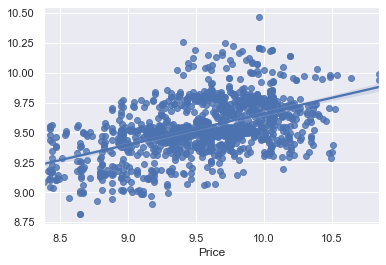

******************************LassoCV******************************
MAE : 0.3270202092290381
RMSE : 0.40598607215854077
------------------------------
Training r2 score: 25.080401073485802 %
Testing r2 Score: 25.2586531917533 %
------------------------------

Cross validation score : 13.169402371365354

Accuracy Score - Cross Validation Score : 12.089250820387946


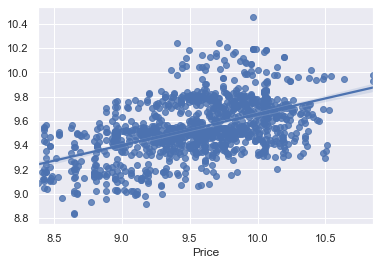

******************************RidgeCV******************************
MAE : 0.32766281962277527
RMSE : 0.40675004247493995
------------------------------
Training r2 score: 24.927300728267433 %
Testing r2 Score: 24.977097252595982 %
------------------------------

Cross validation score : 12.740426524680066

Accuracy Score - Cross Validation Score : 12.236670727915916


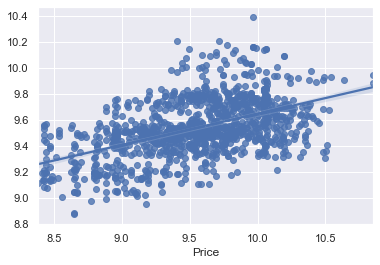

******************************DecisionTreeRegressor******************************
MAE : 0.24405755674796747
RMSE : 0.3654359813162432
------------------------------
Training r2 score: 99.94354405099081 %
Testing r2 Score: 39.44343081030367 %
------------------------------

Cross validation score : -17.07812388149889

Accuracy Score - Cross Validation Score : 56.52155469180256


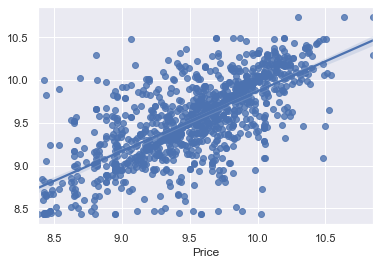

******************************RandomForestRegressor******************************
MAE : 0.1893141376946822
RMSE : 0.25996789110711016
------------------------------
Training r2 score: 95.32807157706034 %
Testing r2 Score: 69.3536983506731 %
------------------------------

Cross validation score : 31.555960226103043

Accuracy Score - Cross Validation Score : 37.79773812457006


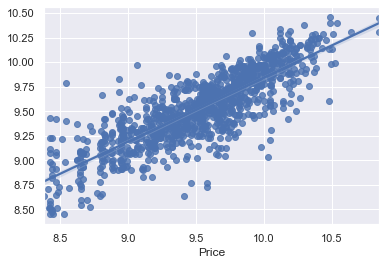

******************************XGBRegressor******************************
MAE : 0.1847988843624336
RMSE : 0.25109200997962067
------------------------------
Training r2 score: 94.21529643430587 %
Testing r2 Score: 71.4106398178546 %
------------------------------

Cross validation score : 42.38561140888737

Accuracy Score - Cross Validation Score : 29.02502840896723


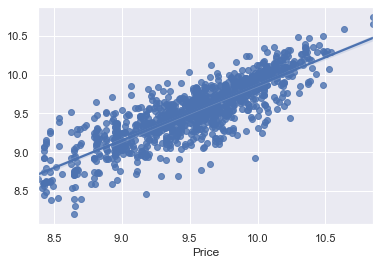

******************************ExtraTreesRegressor******************************
MAE : 0.18038880715820868
RMSE : 0.24937945975030792
------------------------------
Training r2 score: 99.94354405099081 %
Testing r2 Score: 71.79929216314935 %
------------------------------

Cross validation score : 35.63796819666828

Accuracy Score - Cross Validation Score : 36.16132396648106


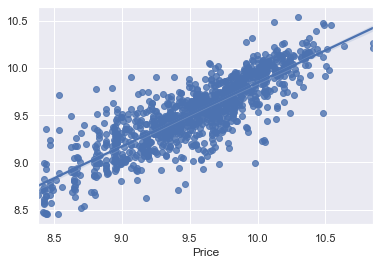

******************************LGBMRegressor******************************
MAE : 0.1889235083086835
RMSE : 0.2552622744527974
------------------------------
Training r2 score: 82.23625633573515 %
Testing r2 Score: 70.45310023251592 %
------------------------------

Cross validation score : 40.27529074666762

Accuracy Score - Cross Validation Score : 30.1778094858483


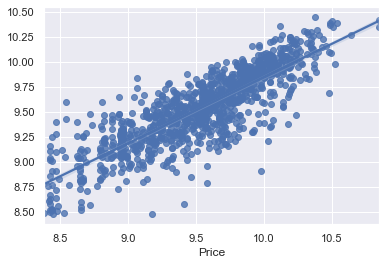

In [70]:
for model in [lr,lasso,ridge,dt,rf,xgb,ext,lgb]:
    BuiltModel(model)

### Hyperparameter Tuning

In [71]:
#lets selects different parameters for tuning
grid_params = {
                'boosting_type': ['str','gbdt'],
                'max_depth ':[-1,-0.5],
                'learning_rate': [0.1,0.2,0.3],
                'n_estimators':[800,900,1000]
                }

In [72]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(LGBMRegressor(), grid_params,verbose=1,refit=True,n_jobs=-1, cv = 5)
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[LightGBM] [Warning] max_depth is set=-1, max_depth= will be ignored. Current value: max_depth=-1
[LightGBM] [Warning] Unknown parameter: -1


GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'boosting_type': ['str', 'gbdt'],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth ': [-1, -0.5],
                         'n_estimators': [800, 900, 1000]},
             verbose=1)

In [73]:
GCV.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.1,
 'max_depth ': -1,
 'n_estimators': 800}

In [74]:
#lets train and test our final model with best parameters
model = LGBMRegressor(boosting_type = 'gbdt', learning_rate = 0.1, n_estimators = 800, max_depth=-1)
model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 0.17894359119758135
RMSE : 0.24698922090863393
------------------------------
 
r2 Score: 72.33729469592551 %


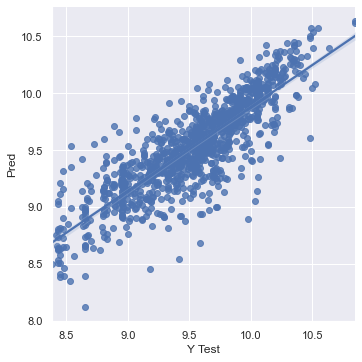

In [75]:
# Actual Values vs Predicted Values

data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
plt.show()

In [76]:
predicted_prices = np.exp(pred)

In [77]:
predicted_prices

array([ 7433.22370328, 12387.01942744, 11249.15047659, ...,
       10256.49325086, 16609.95001509, 11950.90392066])

### Saving the model

In [78]:
import joblib
joblib.dump(model,"Flight_Price_Model.pkl")

['Flight_Price_Model.pkl']

                                                  ----- --:-- -----